In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


In [2]:
df = pd.read_csv('~/Desktop/Redback/Ultimate_df.csv')
remove_cols = ['Unnamed: 0'] 
df = df.drop(remove_cols, axis=1)

In [3]:
df

SpeedKMH_mean  SpeedKMH_max  SpeedKMH_min  Gas_mean  Gas_max  \
0         46.824779     84.609711      0.000000  0.719945      1.0   
1         61.355012     90.476089     39.721592  0.808638      1.0   
2         61.096449     90.427589     39.696712  0.811576      1.0   
3         60.759023     90.181877     39.782829  0.808622      1.0   
4         60.949152     89.712265     39.822598  0.809457      1.0   
...             ...           ...           ...       ...      ...   
1377      58.521987     86.206688     38.243599  0.823782      1.0   
1378      57.931751     86.124931     37.967102  0.817472      1.0   
1379      57.560393     86.559700     38.140427  0.812400      1.0   
1380      59.002506     86.405434     38.245289  0.792537      1.0   
1381      61.955786     86.389427     45.975315  0.798002      1.0   

           Gas_min  Brake_mean  Brake_max     Brake_min  Clutch_mean  ...  \
0     0.000000e+00    0.147455   0.948782  0.000000e+00      0.84203  ...   
1     5.777541e-04    0.042622   0.952429  1.612895e-42      1.00000  ...   
2     4.314544e-04    0.044044   0.952889  1.904365e-42      1.00000  ...   
3     8.042427e-05    0.045326   0.945166  2.684888e-42      1.00000  ...   
4     4.134228e-04    0.044219   0.937211  5.351559e-42      1.00000  ...   
...            ...         ...        ...           ...          ...  ...   
1377  2.921104e-04    0.033674   0.801815  1.401298e-45      1.00000  ...   
1378  2.272607e-04    0.032326   0.788827  0.000000e+00      1.00000  ...   
1379  2.821523e-05    0.032975   0.938923  0.000000e+00      1.00000  ...   
1380  5.037030e-09    0.034070   0.782344  1.401298e-45      1.00000  ...   
1381  0.000000e+00    0.060516   0.780278  4.945182e-42      1.00000  ...   

      suspensions_REAR_STATIC_CAMBER  suspensions_REAR_SPRING_RATE  \
0                            -1.7086                   56670.77262   
1                            -1.7086                   56670.77262   
2                            -1.7086                   56670.77262   
3                            -1.7086                   56670.77262   
4                            -1.7086                   56670.77262   
...                              ...                           ...   
1377                         -1.5465                   35590.17408   
1378                         -1.5465                   35590.17408   
1379                         -1.5465                   35590.17408   
1380                         -1.5465                   35590.17408   
1381                         -1.5465                   35590.17408   

      suspensions_REAR_BUMP_STOP_RATE  suspensions_REAR_PACKER_RANGE  \
0                        104990.04453                        0.10876   
1                        104990.04453                        0.10876   
2                        104990.04453                        0.10876   
3                        104990.04453                        0.10876   
4                        104990.04453                        0.10876   
...                               ...                            ...   
1377                      78945.44905                        0.06733   
1378                      78945.44905                        0.06733   
1379                      78945.44905                        0.06733   
1380                      78945.44905                        0.06733   
1381                      78945.44905                        0.06733   

      suspensions_REAR_DAMP_BUMP  suspensions_REAR_DAMP_FAST_BUMP  \
0                     1198.99360                        503.80323   
1                     1198.99360                        503.80323   
2                     1198.99360                        503.80323   
3                     1198.99360                        503.80323   
4                     1198.99360                        503.80323   
...                          ...                              ...   
1377                  2623.27446                   

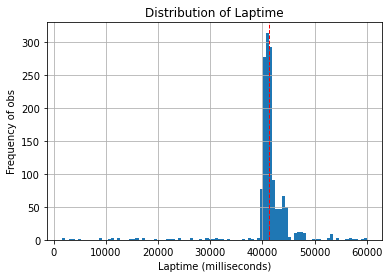

In [4]:
# distributions of continuous variables of interest 
df["LapTime_max"].hist(bins = 100)
plt.axvline(df["LapTime_max"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.title("Distribution of Laptime")
plt.xlabel("Laptime (milliseconds)")
plt.ylabel("Frequency of obs")
plt.show()

In [5]:
df["LapTime_max"].describe()

count     1382.000000
mean     41240.112156
std       4833.028161
min       1671.000000
25%      40668.750000
50%      41272.500000
75%      42028.500000
max      59979.000000
Name: LapTime_max, dtype: float64

- We can see that laptime is generally around just under 42 seconds for majority of our observations 
- If you look at the left tail of the graph, we can see that there are a number of cases whereby laptime is very short compared to the average. 
- Doing some further inspection, we found that these cars were finishing the race within a few seconds which is impossible 
    - Digging deeper, we found that these cars were often at their last laps before the simulation was terminated which suggests that these simulations were cut off early without them finishing their lap
    - We would normally look at LapInvalidated to see whether a lap was finished or not but we found that LapInvalidated was actually 0 for all cars and datasets which is why we removed this variable from our analysis 
    - After consulting with our client Jake, he confirmed to us that simulations were often cut off at a specific time irrespective of whether a car was in the middle of a lap or not 
    - Therefore, we decided to remove laps that were unfinished by removing the last lap for each race for good measure. 

In [6]:
df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis=1)
df = df_recent

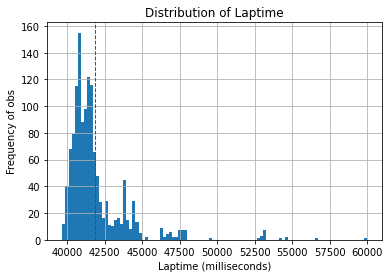

In [7]:
# distributions of continuous variables of interest (after removing premature lap)
df["LapTime_max"].hist(bins = 100)
plt.axvline(df["LapTime_max"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.title("Distribution of Laptime")
plt.xlabel("Laptime (milliseconds)")
plt.ylabel("Frequency of obs")
plt.show()

We can see now that all the premature lap records have been removed.

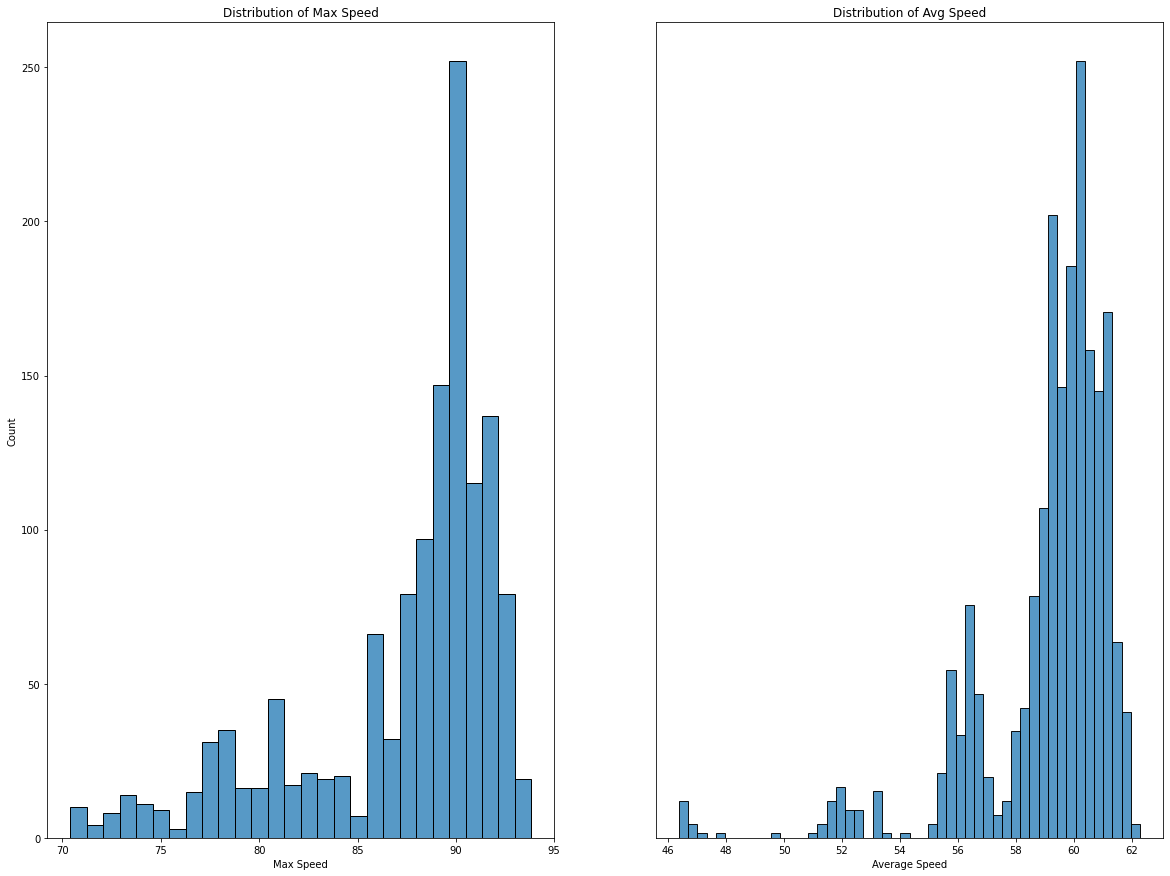

In [8]:
fig, axs = plt.subplots(ncols = 2)
fig.set_figheight(15)
fig.set_figwidth(20)
sns.histplot(x = "SpeedKMH_max", data = df_recent, ax = axs[0]).set(xlabel = "Max Speed", title = "Distribution of Max Speed")
sns.histplot(x = "SpeedKMH_mean", data = df_recent, ax = axs[1]).set(ylabel = None, yticks = [], xlabel = "Average Speed", title = "Distribution of Avg Speed")
plt.show()

- For most cars, their maximum speed in a lap was around 90kmh 
- However, there is a significant proportion of cars travelling at below this maximum speed which suggests that:
    - either their car cannot reach those speeds due to the input parameters or -> yes, this is the case 
    - there were other cars on the road at the same time which prevented them from reaching the speeds -> no because only 2 cars on at one time and 1 is human car in pit lane
    - maybe this lap had bad wet weather preventing the driver to reach max speeds (no way to check this since we don't have weather data) 
- The average speed seems to be around 60kmh with some cars averaging very low
    - Why are these cars averaging such low speeds? 
        - could it be due to input parameters preventing them from reaching higher speeds? -> probably 
        - could this be related to pit lane issues where the car is stationary for most of the lap? -> no, since we removed the pit lane laps 

In [9]:
# To find which input parameters resulted in this, we can do it like this...
unique_input = df_recent['tyres_REAR_PRESSURE_STATIC'].unique()
unique_input

array([11.37812, 12.54306, 14.82224, 14.11274,  7.48544,  7.60754,
       19.8595 , 13.23161,  8.76294, 15.72955, 19.44935, 11.02066,
       17.08256, 16.39999,  8.13701, 16.98833,  7.15806, 12.40084,
       18.07541,  9.02891, 19.69421,  8.24381,  6.21082, 15.57597,
       16.94134, 14.24009, 14.75932, 18.18291, 11.53837, 15.85567,
       19.58432, 13.7942 , 11.01071, 15.44194, 17.39625, 19.01133,
       16.51761,  7.1312 , 10.69406, 16.76262, 15.63273, 16.79474,
       16.59406, 16.85744, 18.92353,  8.96583, 18.65337,  6.28915,
        6.97863,  9.79383, 17.23205, 14.31058,  9.81609,  8.8092 ,
       12.92179, 16.6901 ,  8.46028, 16.31221, 16.45031,  6.16511,
       12.26168, 13.34858, 15.95766, 15.22723, 15.58564, 12.67166,
       15.62418, 13.85508,  9.31563,  7.112  , 12.96261,  8.44881,
       17.47092, 12.76861, 10.35222, 14.75114,  8.68237, 16.17211,
       13.17604, 13.52699, 11.45303, 14.2911 , 14.52467, 15.8934 ])

Therefore, the worst peforming car is in Data2.7 --> Data2_47
(when tyres_REAR_PRESSURE_STATIC = 6.28915)

In [10]:
# Data where max speed is 70~75 
df_70_75 = df_recent.query("SpeedKMH_max >= 70 & SpeedKMH_max < 75")

# Data where max speed if 75~80
df_75_80 = df_recent.query("SpeedKMH_max >= 75 & SpeedKMH_max < 80")

# Data where max speed is 80~85
df_80_85 = df_recent.query("SpeedKMH_max >= 80 & SpeedKMH_max < 85")

# Data where max speed is > 85
df_85_inf = df_recent.query("SpeedKMH_max >= 85")

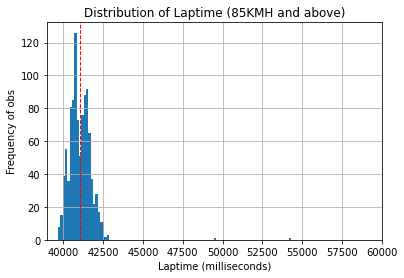

In [11]:
# lap time distribution of > 85
df_85_inf["LapTime_max"].hist(bins = 100)
plt.axvline(df_85_inf["LapTime_max"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.title("Distribution of Laptime (85KMH and above)")
plt.xlabel("Laptime (milliseconds)")
plt.ylabel("Frequency of obs")
plt.xlim(39000, 60000)
plt.show()

In [12]:
df_85_inf["LapTime_max"].mean()

41057.888563049855

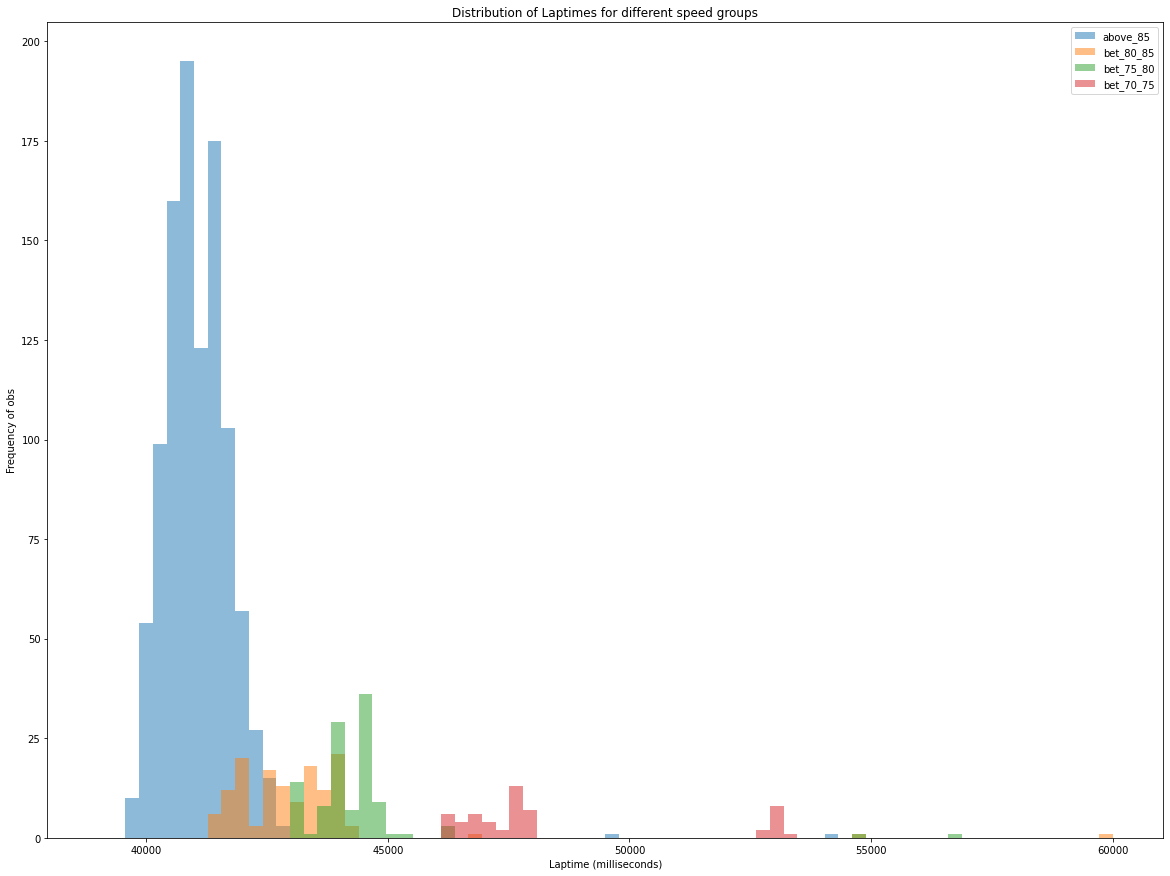

In [13]:
plot3 = plt.figure()
plot3.set_figheight(15)
plot3.set_figwidth(20)

above_85 = df_85_inf
bet_80_85 = df_80_85
bet_75_80 = df_75_80
bet_70_75 = df_70_75

bins = np.linspace(39000, 60000, 75)

plt.hist(above_85["LapTime_max"], bins, alpha=0.5, label='above_85')
plt.hist(bet_80_85["LapTime_max"], bins, alpha=0.5, label='bet_80_85')
plt.hist(bet_75_80["LapTime_max"], bins, alpha=0.5, label='bet_75_80')
plt.hist(bet_70_75["LapTime_max"], bins, alpha=0.5, label='bet_70_75')
plt.title("Distribution of Laptimes for different speed groups")
plt.xlabel("Laptime (milliseconds)")
plt.ylabel("Frequency of obs")
plt.legend(loc = 'upper right')
plt.show()

In [14]:
# trying to find out which input parameters are attributing to these slow max speeds and subsequently poor performance in laptime 

df_70_75_case_outlier = df_recent.query("SpeedKMH_max >= 70 & SpeedKMH_max < 75 & LapTime_max >= 50000")
df_70_75= df_recent.query("SpeedKMH_max >= 70 & SpeedKMH_max < 75 & LapTime_max <= 50000")

df_85_inf = df_recent.query("SpeedKMH_max >= 85 & LapTime_max <= 45000")
df_80_85 = df_recent.query("SpeedKMH_max >= 80 & SpeedKMH_max < 85 & LapTime_max <= 45000")
df_75_80 = df_recent.query("SpeedKMH_max >= 75 & SpeedKMH_max < 80 & LapTime_max <= 50000")

# notice that we remove the outliers from this analysis part so the averages dont get impacted

df_70_75_inputs_c_o = df_70_75_case_outlier.iloc[:,-33:]
df_70_75_inputs = df_70_75.iloc[:,-33:]
df_75_80_inputs = df_75_80.iloc[:,-33:]
df_80_85_inputs = df_80_85.iloc[:,-33:]
df_85_inf_inputs = df_85_inf.iloc[:,-33:]

df_70_75_inputs_c_o["y"] = "bet_70_75_case"
df_70_75_inputs["y"] = "bet_70_75"
df_75_80_inputs["y"] = "bet_75_80"
df_80_85_inputs["y"] = "bet_80_85"
df_85_inf_inputs["y"] = "above_85"

data = df_70_75_inputs_c_o.append(df_70_75_inputs)
data = data.append(df_75_80_inputs)
data = data.append(df_80_85_inputs)
data = data.append(df_85_inf_inputs)

y = data["y"]
X = data.iloc[:,:33]

In [15]:
# scaling using standardscalar (mean 0 and std 1)
scaler = StandardScaler() 
scaler = RobustScaler() # feature scaling (robust method which isn't sensitive to outliers)

#X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

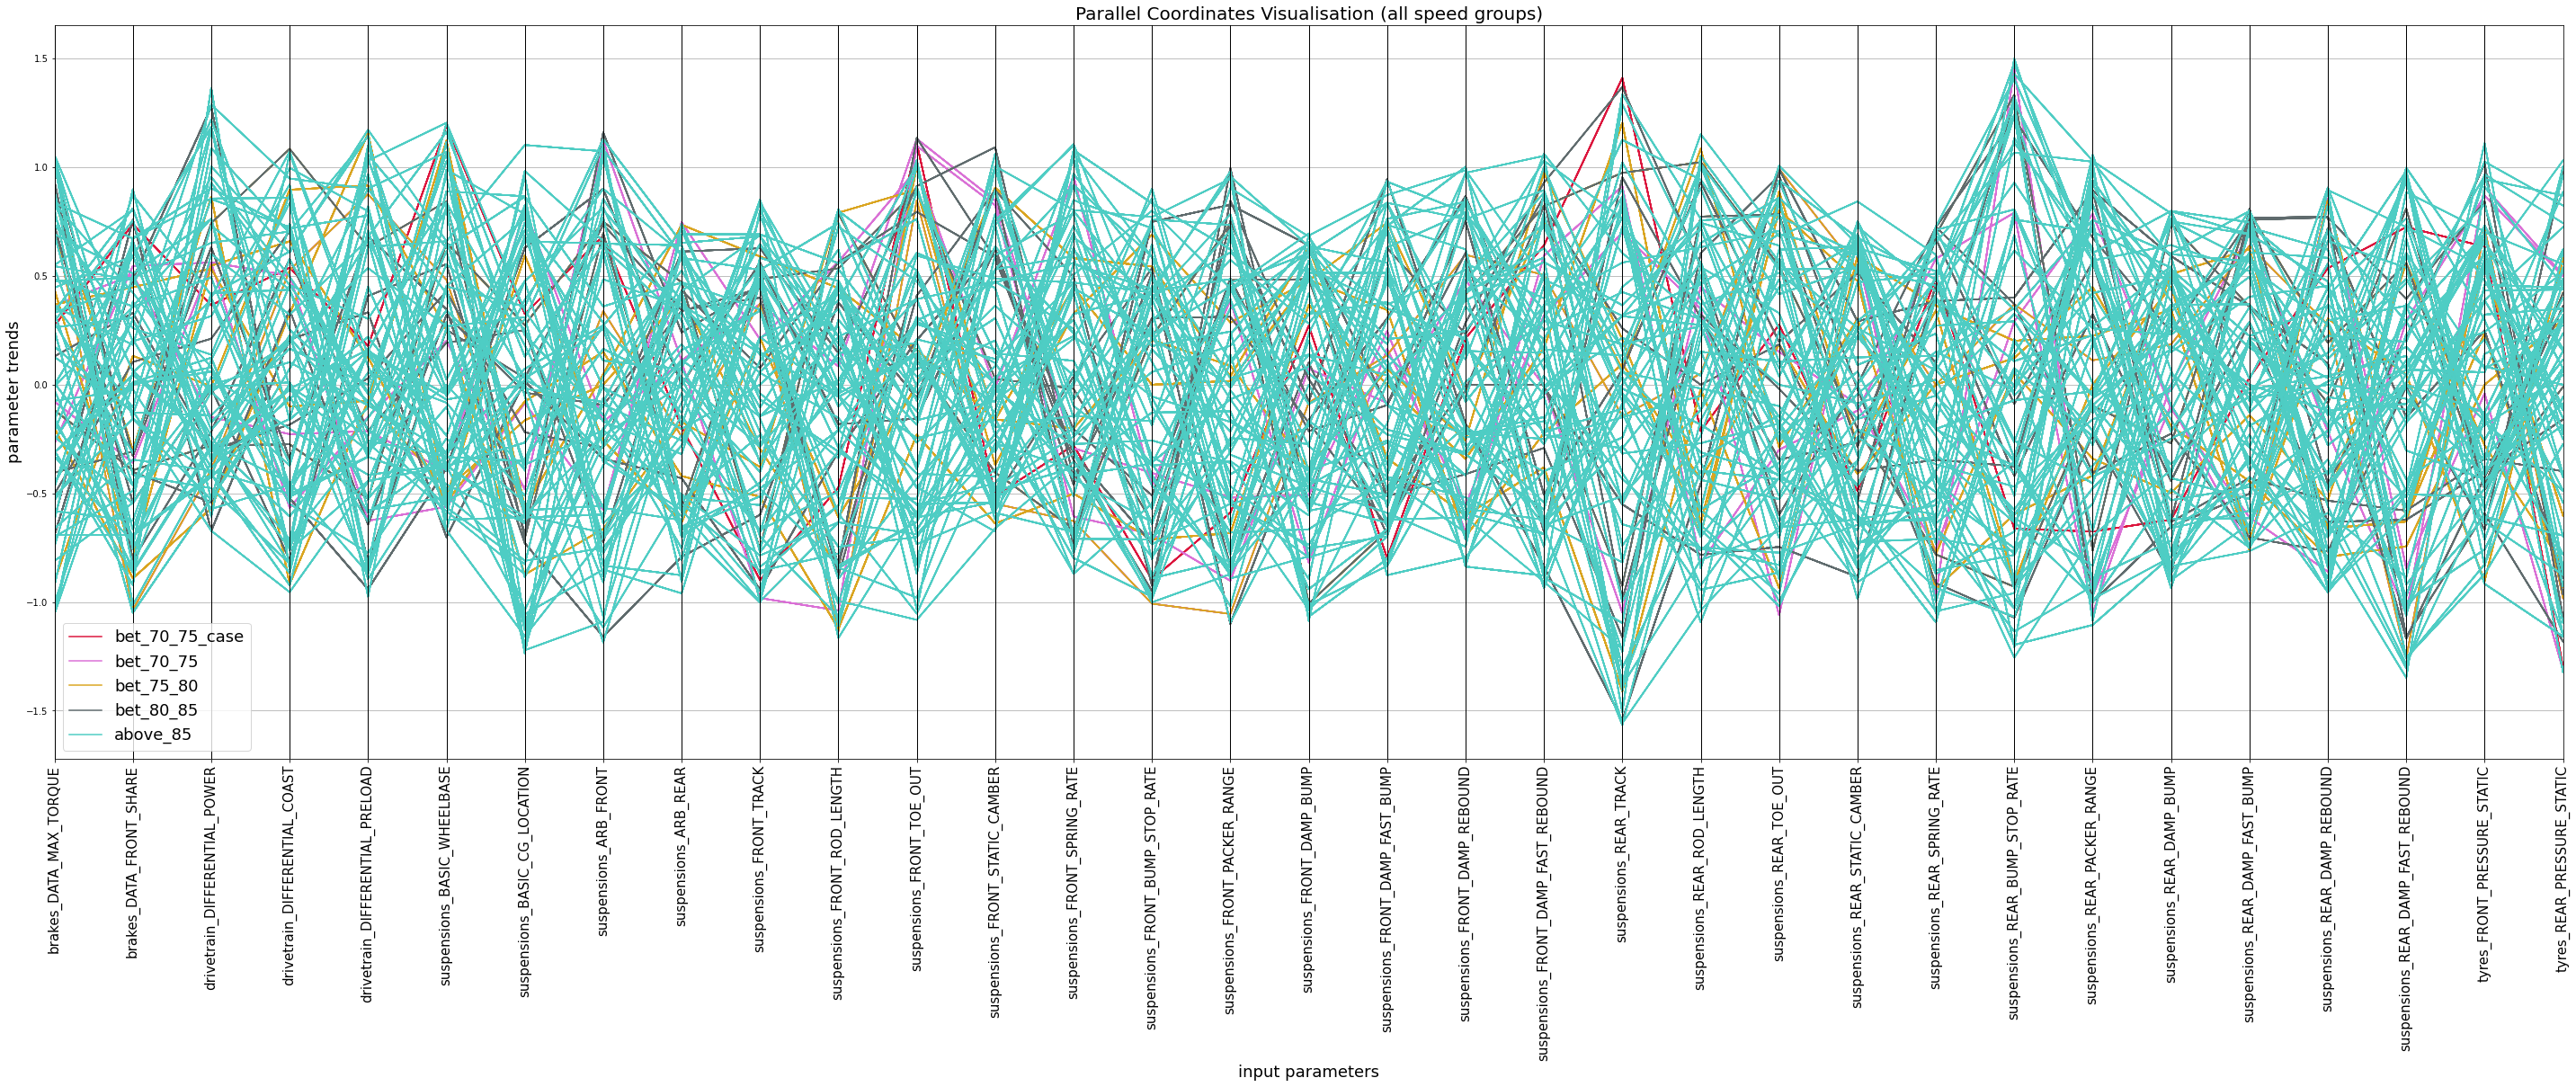

In [16]:
X_norm.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

data_norm = pd.concat([X_norm, y], axis = 1)

plot4 = plt.figure()
pd.plotting.parallel_coordinates(data_norm, 'y', color = ('#DC143C', '#DA70D6', '#DAA520', '#5F6B6D', '#4ECDC4'))
plot4.set_figheight(15)
plot4.set_figwidth(50)
plt.xticks(rotation=90, fontsize = 15) 
plt.title("Parallel Coordinates Visualisation (all speed groups)", fontsize = 20)
plt.xlabel('input parameters', fontsize = 18)
plt.ylabel('parameter trends', fontsize = 18)
plt.legend(prop = {"size":18},loc = 'lower left')
plt.show()

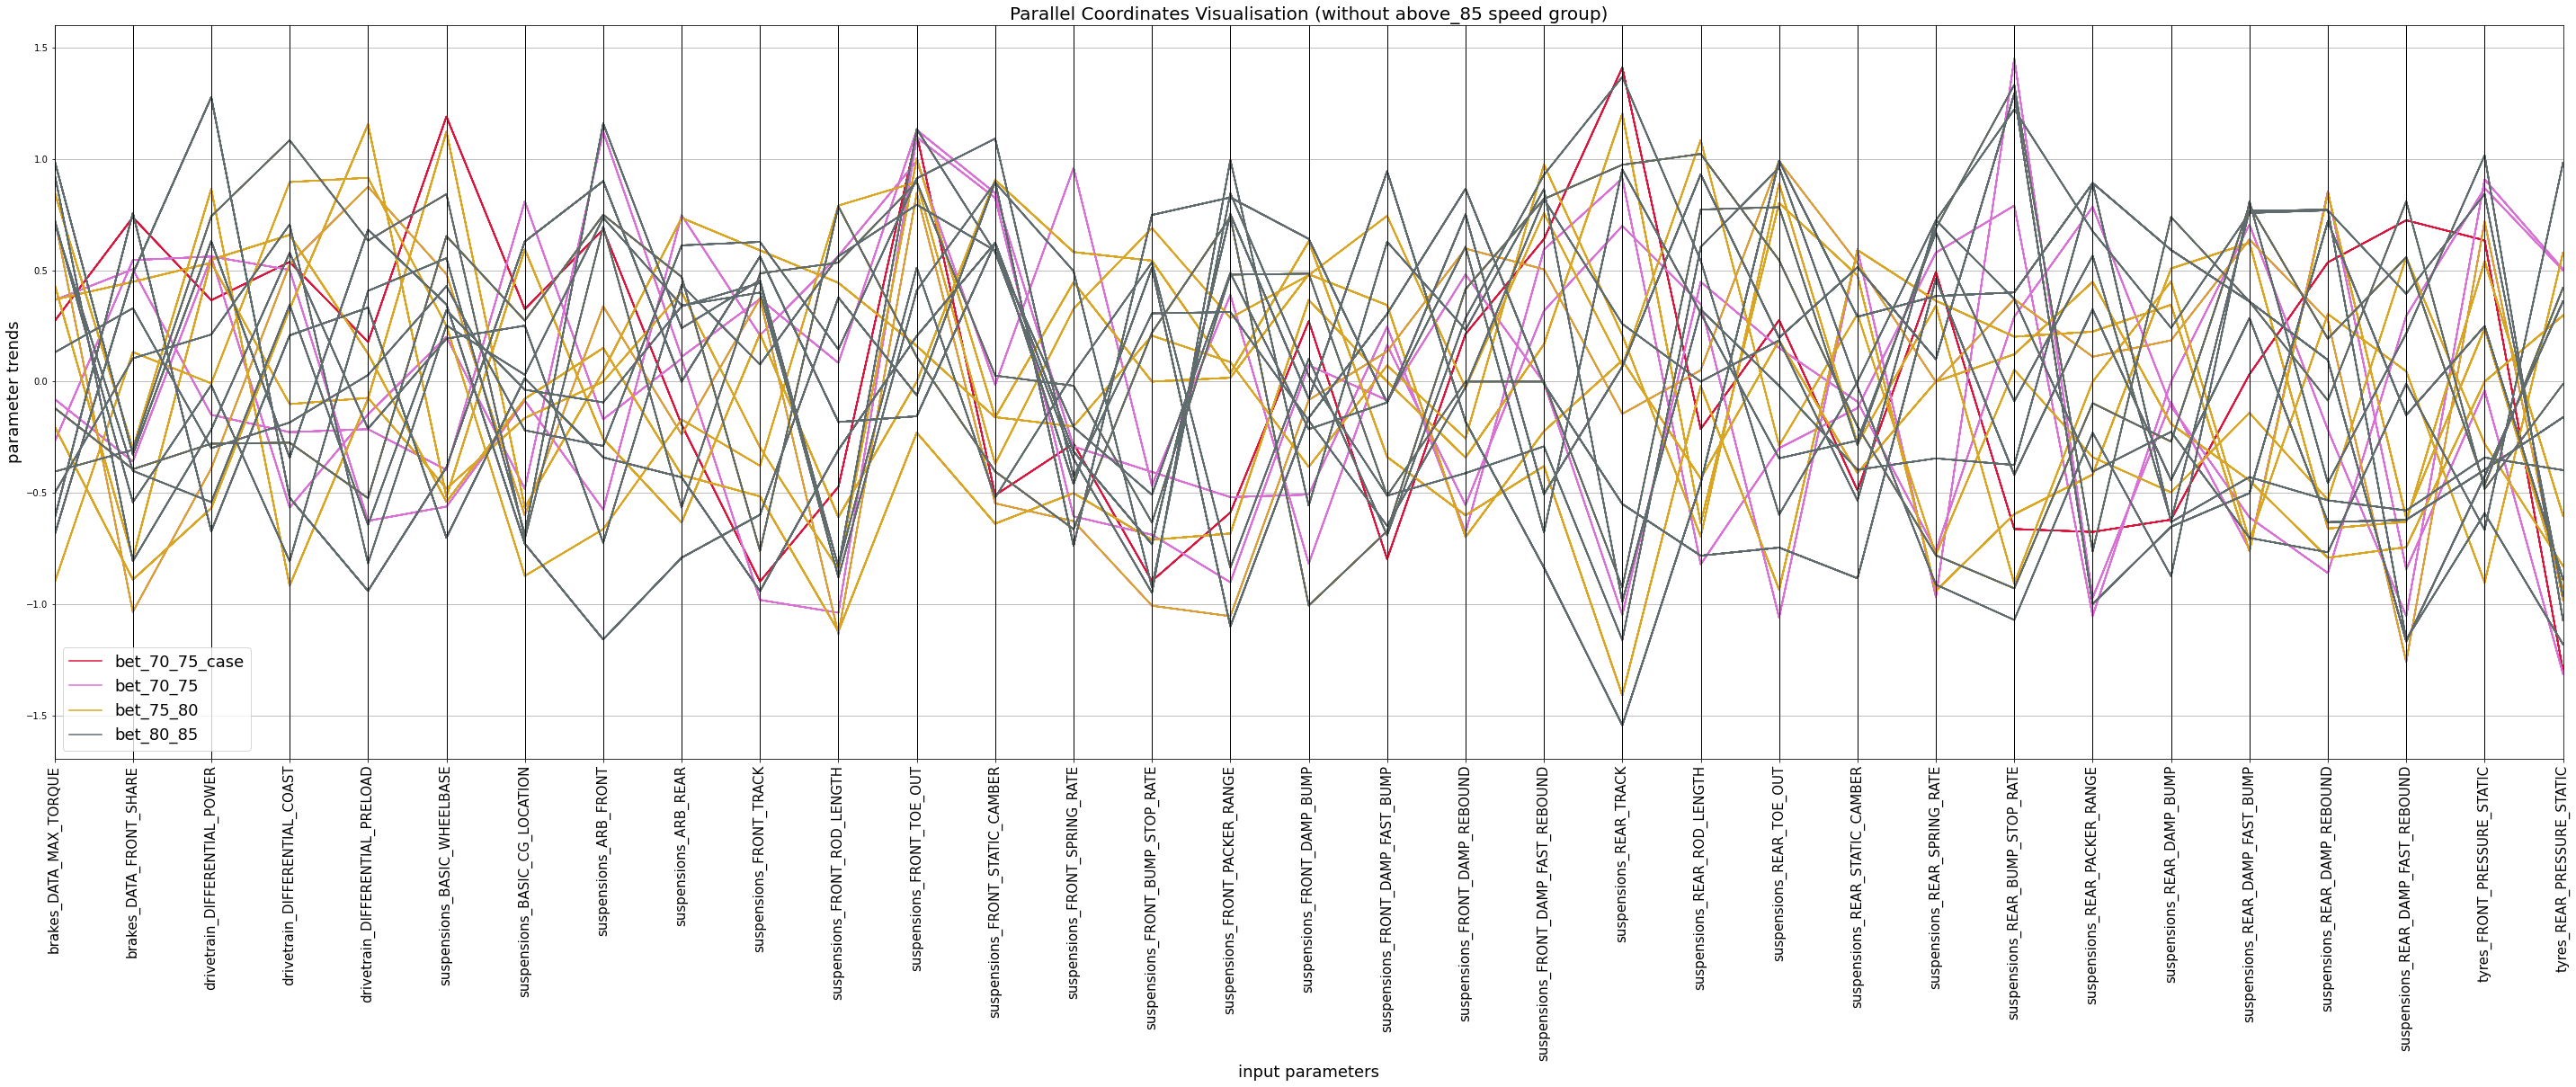

In [17]:
df_70_75_case_outlier = df_recent.query("SpeedKMH_max >= 70 & SpeedKMH_max < 75 & LapTime_max >= 50000")
df_70_75= df_recent.query("SpeedKMH_max >= 70 & SpeedKMH_max < 75 & LapTime_max <= 50000")

df_85_inf = df_recent.query("SpeedKMH_max >= 85 & LapTime_max <= 45000")
df_80_85 = df_recent.query("SpeedKMH_max >= 80 & SpeedKMH_max < 85 & LapTime_max <= 45000")
df_75_80 = df_recent.query("SpeedKMH_max >= 75 & SpeedKMH_max < 80 & LapTime_max <= 50000")

df_70_75_inputs_c_o = df_70_75_case_outlier.iloc[:,-33:]
df_70_75_inputs = df_70_75.iloc[:,-33:]
df_75_80_inputs = df_75_80.iloc[:,-33:]
df_80_85_inputs = df_80_85.iloc[:,-33:]

df_70_75_inputs_c_o["y"] = "bet_70_75_case"
df_70_75_inputs["y"] = "bet_70_75"
df_75_80_inputs["y"] = "bet_75_80"
df_80_85_inputs["y"] = "bet_80_85"


data2 = df_70_75_inputs_c_o.append(df_70_75_inputs)
data2 = data2.append(df_75_80_inputs)
data2 = data2.append(df_80_85_inputs)

y2 = data2["y"]

X_norm2 = X_norm.iloc[:-1023,:]

plot5 = plt.figure()

X_norm2.reset_index(drop=True, inplace=True)
y2.reset_index(drop=True, inplace=True)

data_norm2 = pd.concat([X_norm2, y2], axis = 1)
pd.plotting.parallel_coordinates(data_norm2, 'y', color = ('#DC143C', '#DA70D6', '#DAA520', '#5F6B6D'))
plot5.set_figheight(15)
plot5.set_figwidth(50)
plt.xticks(rotation=90, fontsize = 15) 
plt.title("Parallel Coordinates Visualisation (without above_85 speed group)", fontsize = 20)
plt.xlabel('input parameters', fontsize=18)
plt.ylabel('parameter trends', fontsize=18)
plt.legend(prop = {"size":18},loc = 'lower left')

plt.show()

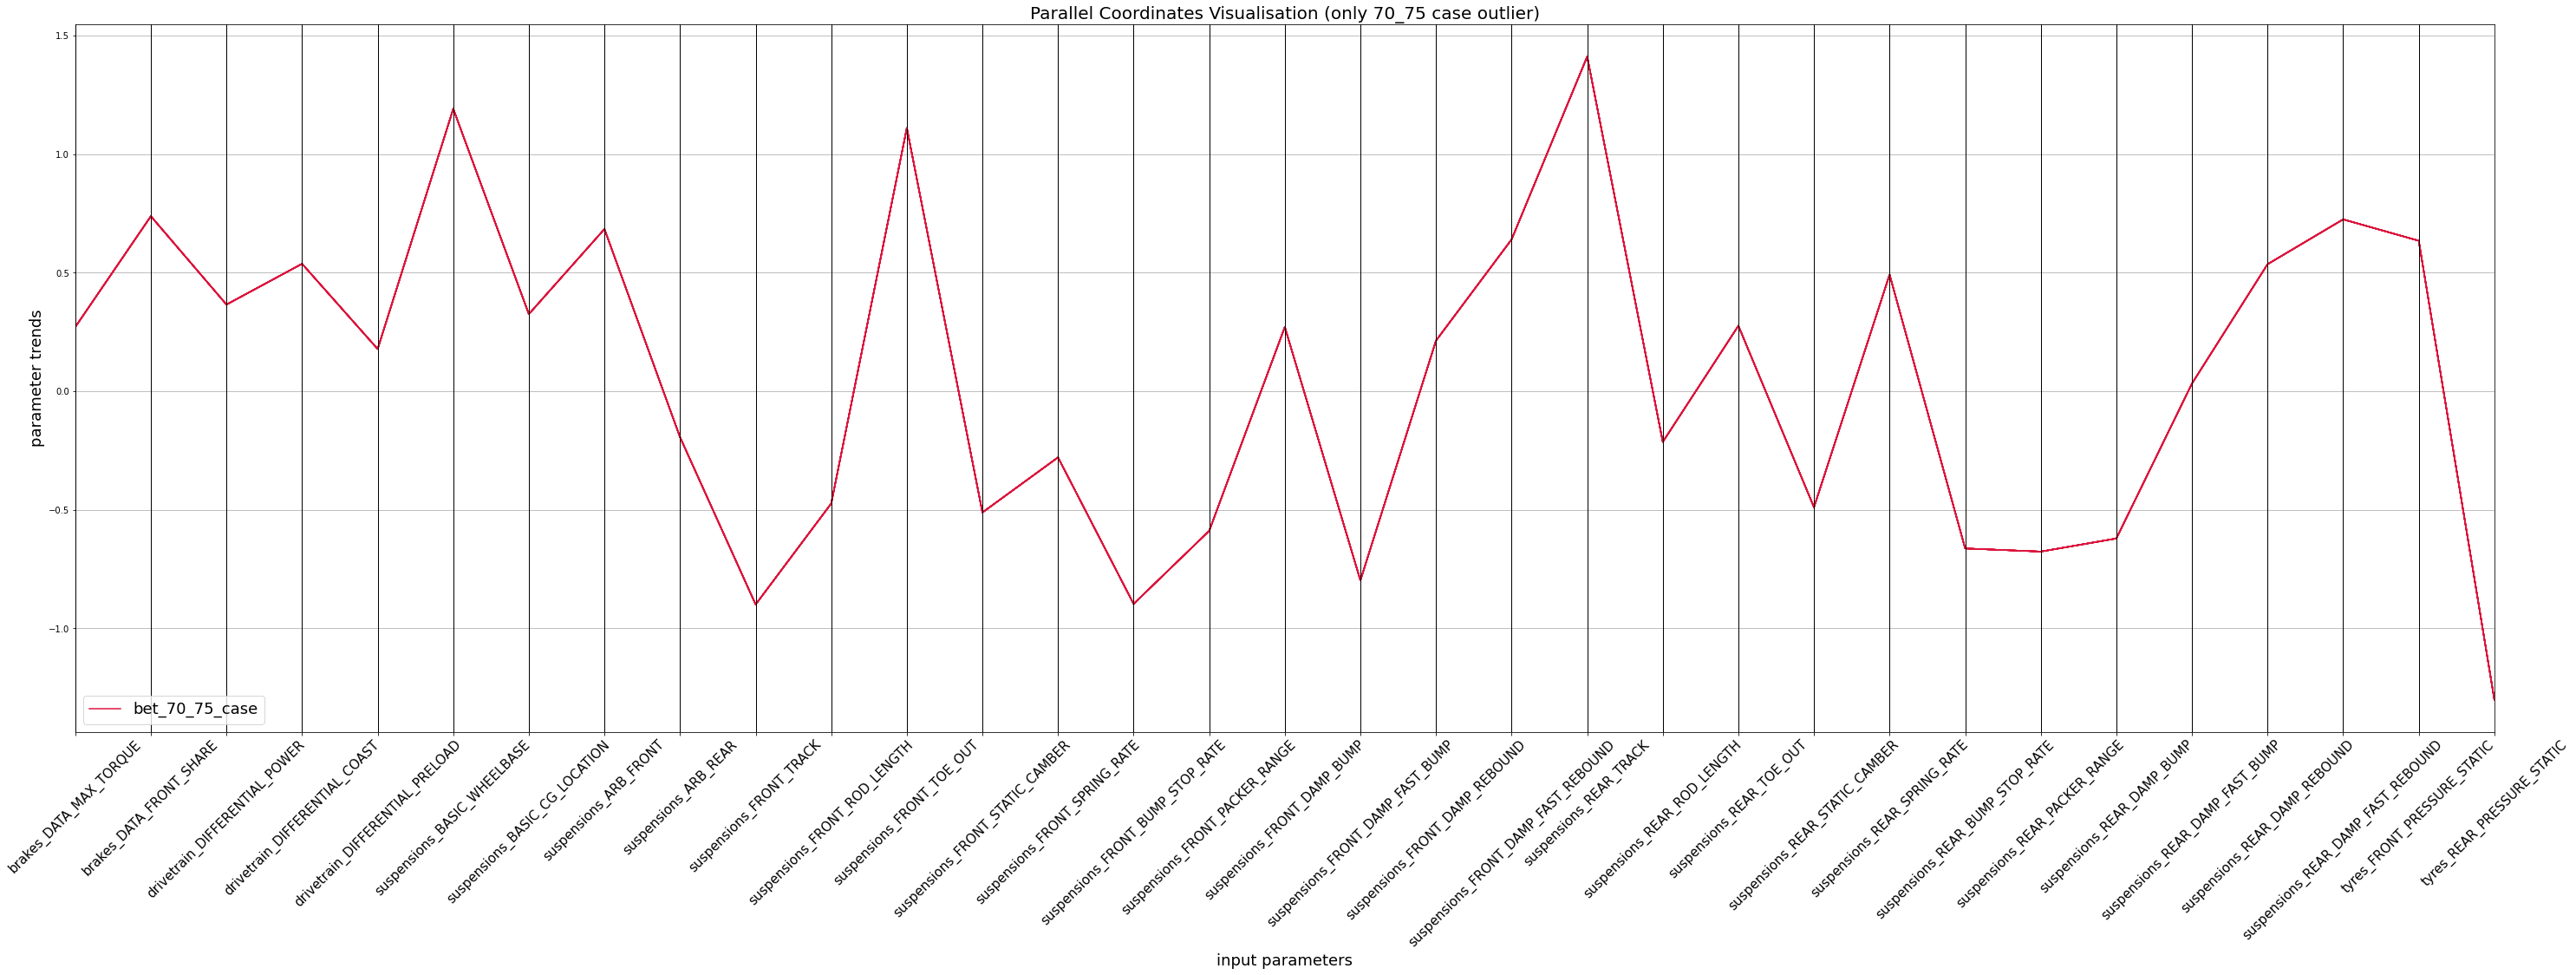

In [18]:
df_70_75_case_outlier = df_recent.query("SpeedKMH_max >= 70 & SpeedKMH_max < 75 & LapTime_max >= 50000")
df_70_75_inputs_c_o = df_70_75_case_outlier.iloc[:,-33:]
df_70_75_inputs_c_o["y"] = "bet_70_75_case"

data2 = df_70_75_inputs_c_o

y2 = data2["y"]
X2 = data2.iloc[:,:33]

X_norm2 = X_norm.iloc[:11,:]

plot5 = plt.figure()

X_norm2.reset_index(drop=True, inplace=True)
y2.reset_index(drop=True, inplace=True)

data_norm2 = pd.concat([X_norm2, y2], axis = 1)
pd.plotting.parallel_coordinates(data_norm2, 'y', color = ('#DC143C'))
plot5.set_figheight(15)
plot5.set_figwidth(50)
plt.xticks(rotation=45, fontsize = 15) 
plt.title("Parallel Coordinates Visualisation (only 70_75 case outlier)", fontsize = 20)
plt.xlabel('input parameters', fontsize=18)
plt.ylabel('parameter trends', fontsize=18)
plt.legend(prop = {"size":18},loc = 'lower left')
plt.xticks(rotation=45) 

plt.show()

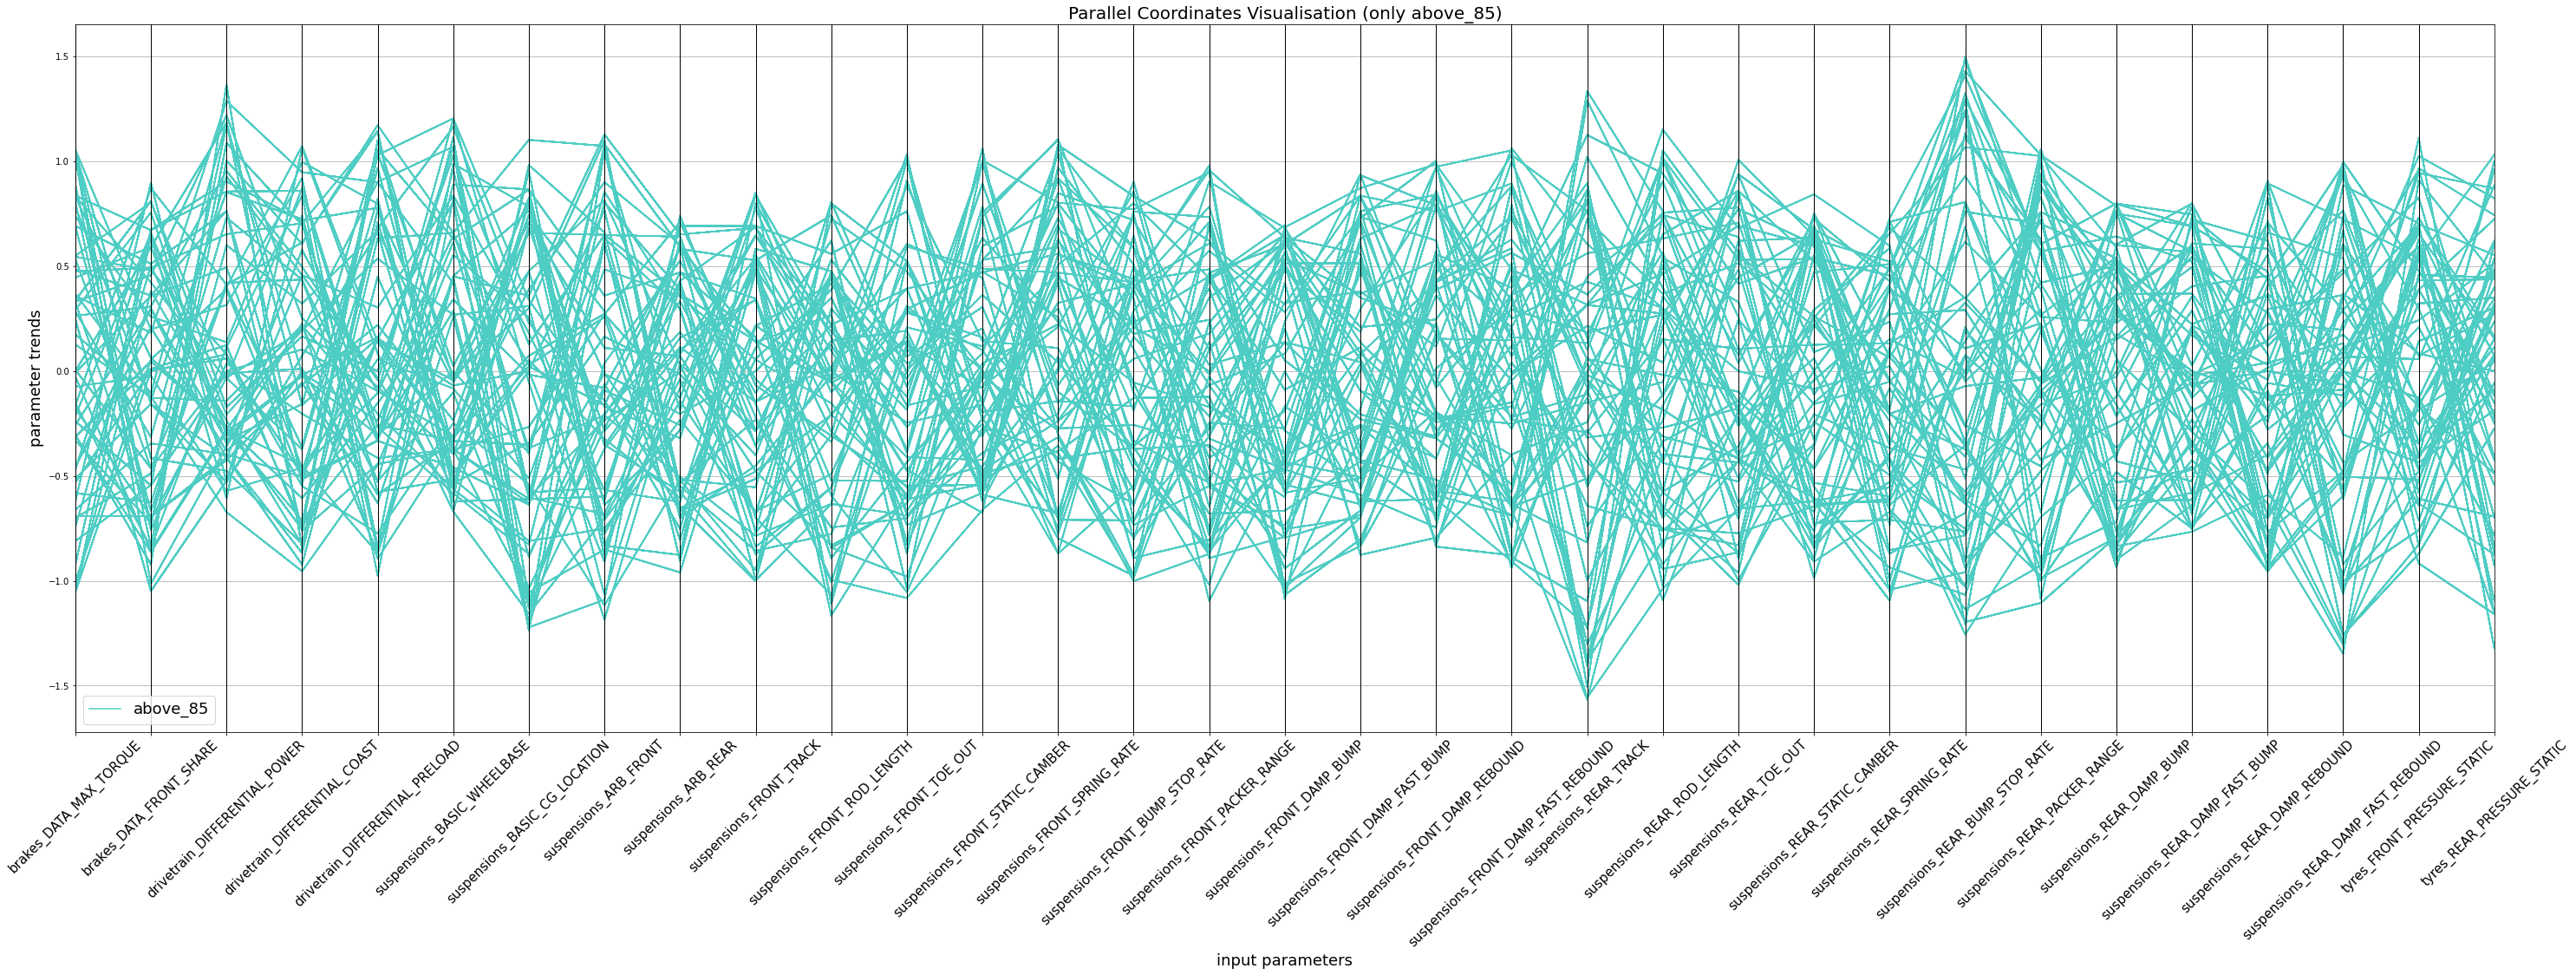

In [19]:
df_85_inf_case = df_recent.query("SpeedKMH_max >= 85 & LapTime_max <= 45000")

df_85_inf_inputs = df_85_inf_case.iloc[:,-33:]
df_85_inf_inputs["y"] = "above_85"

data2 = df_85_inf_inputs

y2 = data2["y"]
X2 = data2.iloc[:,:33]

X_norm2 = X_norm.iloc[-1021:,:]

plot5 = plt.figure()

X_norm2.reset_index(drop=True, inplace=True)
y2.reset_index(drop=True, inplace=True)

data_norm2 = pd.concat([X_norm2, y2], axis = 1)
pd.plotting.parallel_coordinates(data_norm2, 'y', color = ('#4ECDC4'))
plot5.set_figheight(15)
plot5.set_figwidth(50)
plt.xticks(rotation=45, fontsize = 15) 
plt.title("Parallel Coordinates Visualisation (only above_85)", fontsize = 20)
plt.xlabel('input parameters', fontsize=18)
plt.ylabel('parameter trends', fontsize=18)
plt.legend(prop = {"size":18},loc = 'lower left')
plt.xticks(rotation=45) 

plt.show()

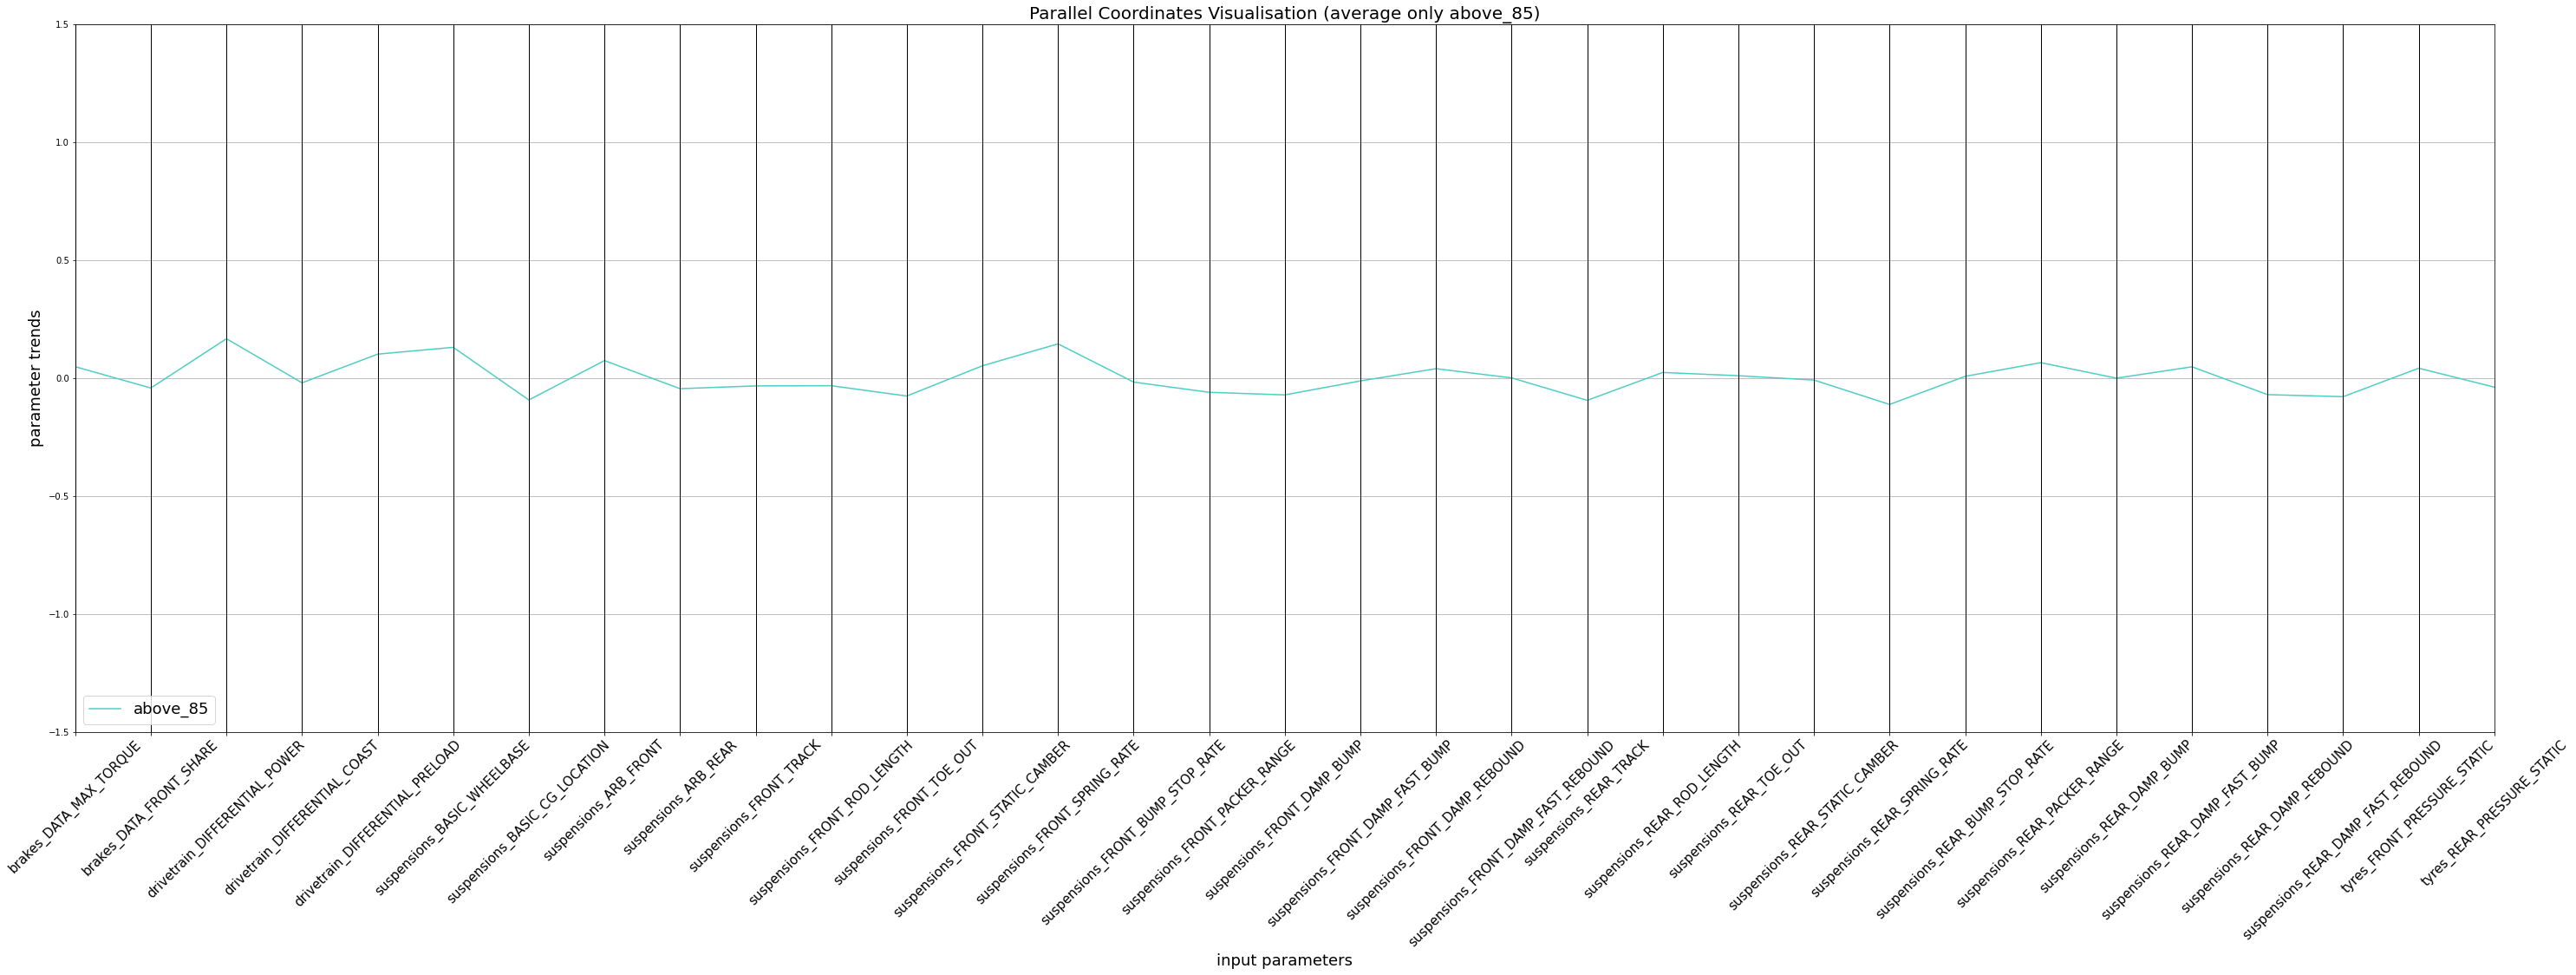

In [20]:
df_85_inf_case = df_recent.query("SpeedKMH_max >= 85 & LapTime_max <= 45000")

df_85_inf_inputs = df_85_inf_case.iloc[0:1,-33:]
df_85_inf_inputs["y"] = "above_85"
data2 = df_85_inf_inputs

y2 = data2["y"]

X_norm2 = X_norm.iloc[-1021:,:]

X_norm2 = pd.DataFrame(X_norm2.mean(axis = 0))
X_norm2 = X_norm2.T

plot5 = plt.figure()

X_norm2.reset_index(drop=True, inplace=True)
y2.reset_index(drop=True, inplace=True)

data_norm2 = pd.concat([X_norm2, y2], axis = 1)
pd.plotting.parallel_coordinates(data_norm2, 'y', color = ('#4ECDC4'))
plot5.set_figheight(15)
plot5.set_figwidth(50)
plt.xticks(rotation=45, fontsize = 15) 
plt.title("Parallel Coordinates Visualisation (average only above_85)", fontsize = 20)
plt.xlabel('input parameters', fontsize=18)
plt.ylabel('parameter trends', fontsize=18)
plt.xticks(rotation=45) 
plt.ylim(-1.5,1.5)
plt.legend(prop = {"size":18},loc = 'lower left')

plt.show()

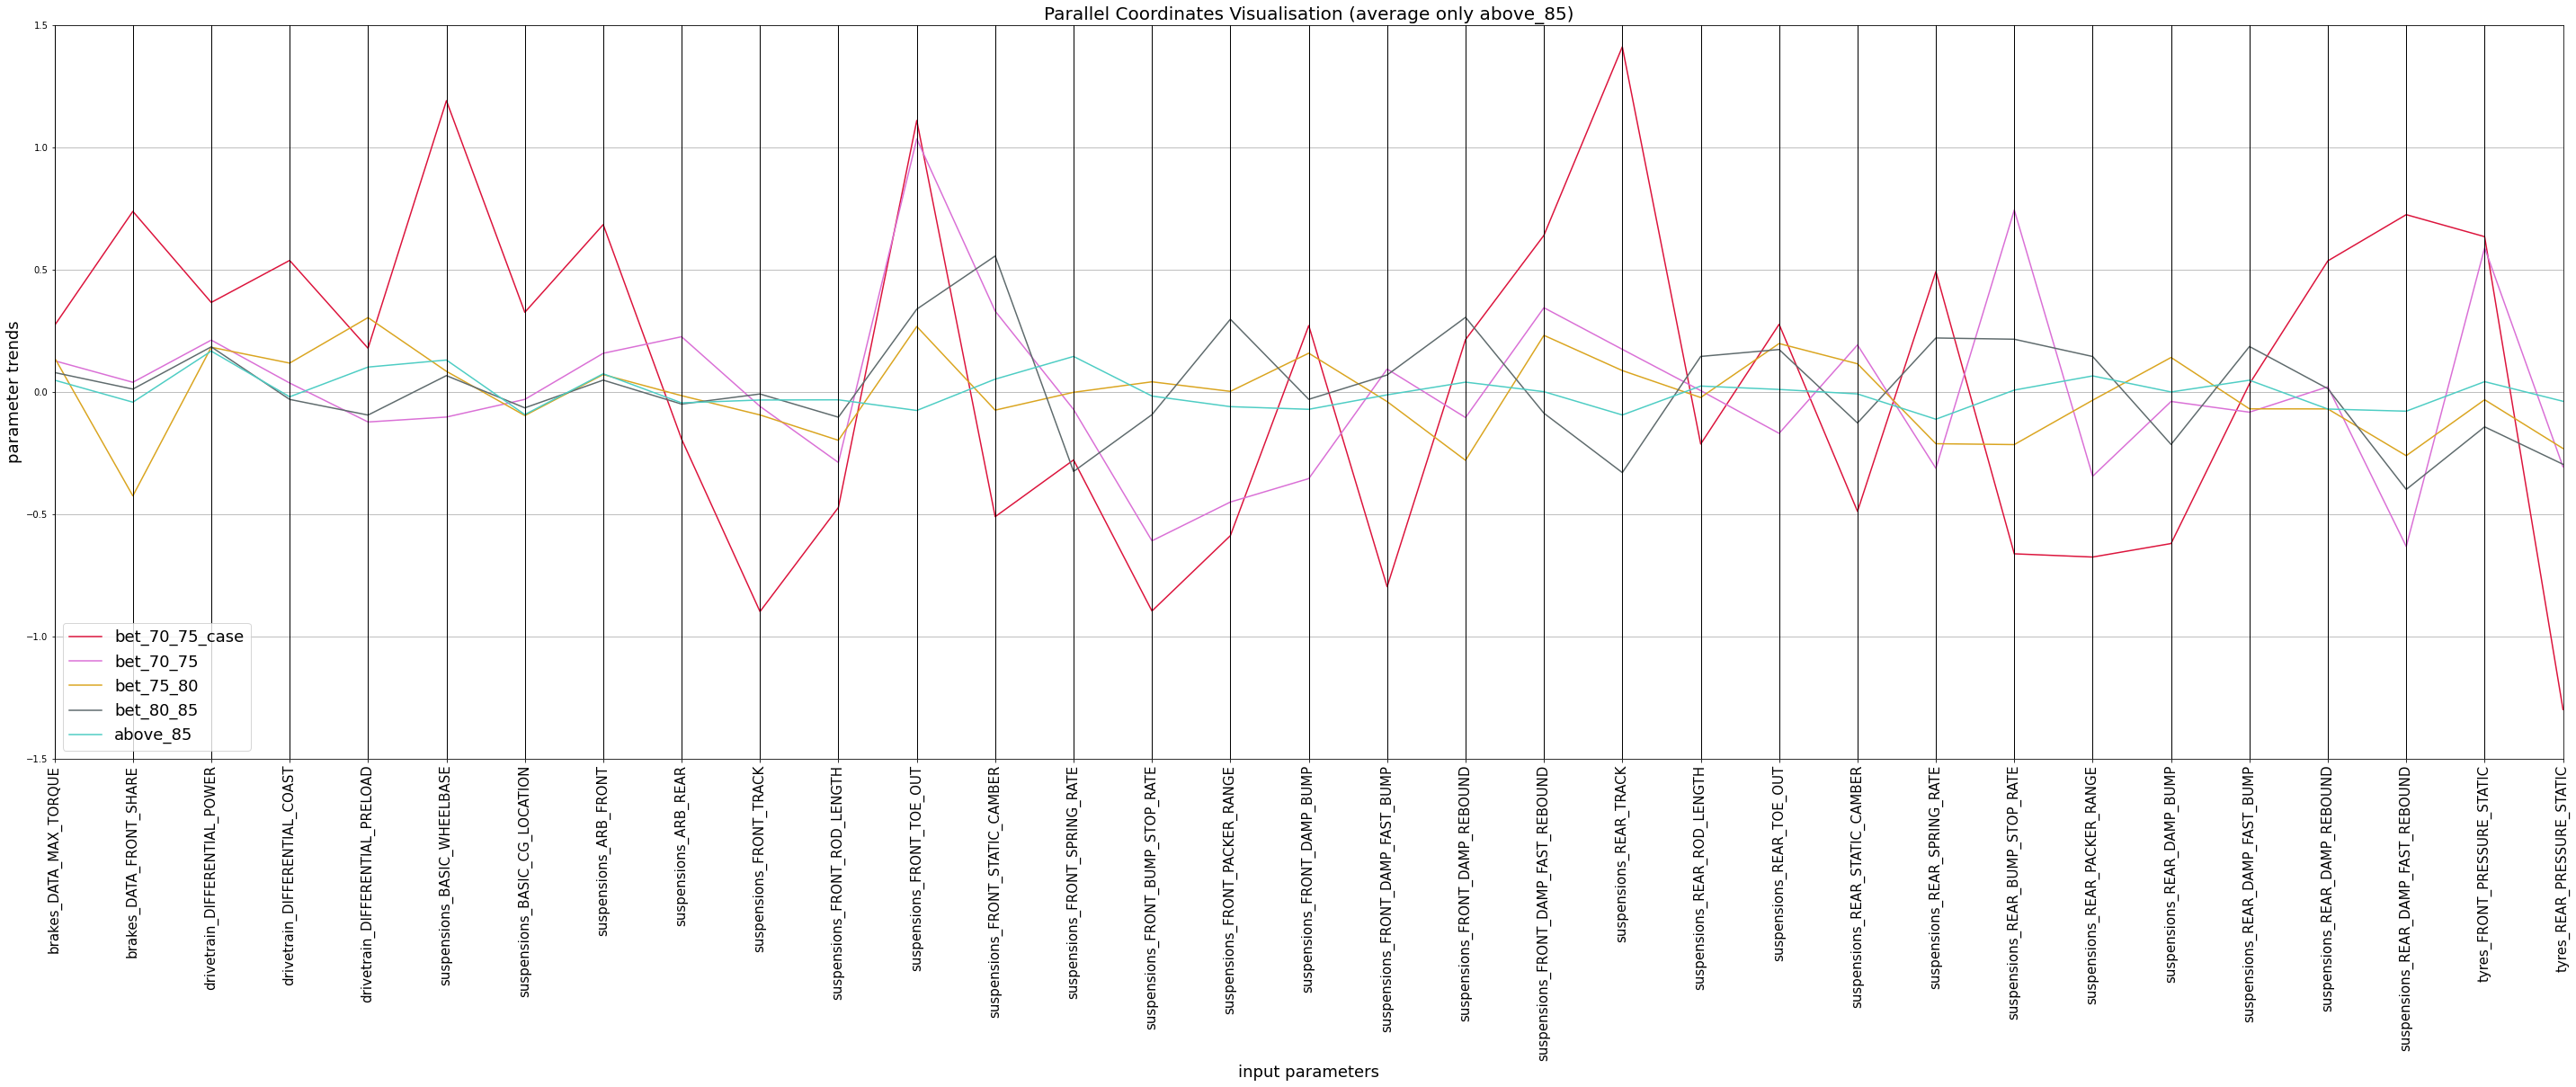

In [21]:
df_70_75_case_outlier = df_recent.query("SpeedKMH_max >= 70 & SpeedKMH_max < 75 & LapTime_max >= 50000")
df_70_75 = df_recent.query("SpeedKMH_max >= 70 & SpeedKMH_max < 75 & LapTime_max <= 50000")

df_85_inf = df_recent.query("SpeedKMH_max >= 85 & LapTime_max <= 45000")
df_80_85 = df_recent.query("SpeedKMH_max >= 80 & SpeedKMH_max < 85 & LapTime_max <= 45000")
df_75_80 = df_recent.query("SpeedKMH_max >= 75 & SpeedKMH_max < 80 & LapTime_max <= 50000")

df_70_75_inputs_c_o = df_70_75_case_outlier.iloc[0:1,-33:]
df_70_75_inputs = df_70_75.iloc[0:1,-33:]
df_75_80_inputs = df_75_80.iloc[0:1,-33:]
df_80_85_inputs = df_80_85.iloc[0:1,-33:]
df_85_inf_inputs = df_85_inf.iloc[0:1,-33:]

df_70_75_inputs_c_o["y"] = "bet_70_75_case"
df_70_75_inputs["y"] = "bet_70_75"
df_75_80_inputs["y"] = "bet_75_80"
df_80_85_inputs["y"] = "bet_80_85"
df_85_inf_inputs["y"] = "above_85"

data2 = df_70_75_inputs_c_o.append(df_70_75_inputs)
data2 = data2.append(df_75_80_inputs)
data2 = data2.append(df_80_85_inputs)
data2 = data2.append(df_85_inf_inputs)

y2 = data2["y"]

X_norm_85_inf = X_norm.iloc[-1021:,:]
X_norm_80_85 = X_norm.iloc[-1156:-1023,:]
X_norm_75_80 = X_norm.iloc[-1265:-1156,:]
X_norm_70_75 = X_norm.iloc[-1307:-1265,:]
X_norm_70_75_c_o = X_norm.iloc[:11,:]
 
X_norm_70_75_c_o = pd.DataFrame(X_norm_70_75_c_o.mean(axis = 0))
X_norm_70_75_c_o = X_norm_70_75_c_o.T

X_norm_70_75 = pd.DataFrame(X_norm_70_75.mean(axis = 0))
X_norm_70_75 = X_norm_70_75.T

X_norm_75_80 = pd.DataFrame(X_norm_75_80.mean(axis = 0))
X_norm_75_80 = X_norm_75_80.T

X_norm_80_85 = pd.DataFrame(X_norm_80_85.mean(axis = 0))
X_norm_80_85 = X_norm_80_85.T

X_norm_85_inf = pd.DataFrame(X_norm_85_inf.mean(axis = 0))
X_norm_85_inf = X_norm_85_inf.T

data3 = X_norm_70_75_c_o.append(X_norm_70_75)
data3 = data3.append(X_norm_75_80)
data3 = data3.append(X_norm_80_85)
data3 = data3.append(X_norm_85_inf)

plot5 = plt.figure()

data3.reset_index(drop=True, inplace=True)
y2.reset_index(drop=True, inplace=True)

data_norm2 = pd.concat([data3, y2], axis = 1)
pd.plotting.parallel_coordinates(data_norm2, 'y', color = ('#DC143C', '#DA70D6', '#DAA520', '#5F6B6D', '#4ECDC4'))
plot5.set_figheight(15)
plot5.set_figwidth(50)
plt.xticks(rotation=45, fontsize = 15) 
plt.title("Parallel Coordinates Visualisation (average only above_85)", fontsize = 20)
plt.xlabel('input parameters', fontsize=18)
plt.ylabel('parameter trends', fontsize=18)
plt.xticks(rotation=90) 
plt.ylim(-1.5,1.5)
plt.legend(prop = {"size":18},loc = 'lower left')

plt.show()

In [22]:
data3

brakes_DATA_MAX_TORQUE  brakes_DATA_FRONT_SHARE  \
0                0.271187                 0.738617   
1                0.127408                 0.039210   
2                0.140478                -0.425547   
3                0.079243                 0.011378   
4                0.048037                -0.042187   

   drivetrain_DIFFERENTIAL_POWER  drivetrain_DIFFERENTIAL_COAST  \
0                       0.365926                       0.537867   
1                       0.211857                       0.036273   
2                       0.182607                       0.117724   
3                       0.184182                      -0.030859   
4                       0.166885                      -0.020185   

   drivetrain_DIFFERENTIAL_PRELOAD  suspensions_BASIC_WHEELBASE  \
0                         0.178460                     1.191575   
1                        -0.123203                    -0.103048   
2                         0.303974                     0.084119   
3                        -0.094889                     0.066536   
4                         0.101472                     0.130334   

   suspensions_BASIC_CG_LOCATION  suspensions_ARB_FRONT  suspensions_ARB_REAR  \
0                       0.325553               0.684418             -0.193397   
1                      -0.030776               0.157876              0.225638   
2                      -0.096872               0.070909             -0.015572   
3                      -0.065417               0.048029             -0.049894   
4                      -0.092937               0.074034             -0.044990   

   suspensions_FRONT_TRACK  ...  suspensions_REAR_STATIC_CAMBER  \
0                -0.898985  ...                       -0.488895   
1                -0.059305  ...                        0.192141   
2                -0.094398  ...                        0.114923   
3                -0.008631  ...                       -0.127213   
4                -0.033324  ...                       -0.008446   

   suspensions_REAR_SPRING_RATE  suspensions_REAR_BUMP_STOP_RATE  \
0                      0.492205                        -0.662673   
1                     -0.312843                         0.744315   
2                     -0.212144                        -0.215729   
3                      0.220490                         0.215409   
4                     -0.111929                         0.007273   

   suspensions_REAR_PACKER_RANGE  suspensions_REAR_DAMP_BUMP  \
0                      -0.675911                   -0.620637   
1                      -0.345173                   -0.039289   
2                      -0.034098                    0.140779   
3                       0.144670                   -0.215122   
4                       0.065319                   -0.000399   

   suspensions_REAR_DAMP_FAST_BUMP  suspensions_REAR_DAMP_REBOUND  \
0                         0.032767                       0.536089   
1                        -0.083144                       0.020858   
2                        -0.069486                      -0.069762   
3                         0.185585                       0.013042   
4                         0.047678                      -0.070269   

   suspensions_REAR_DAMP_FAST_REBOUND  tyres_FRONT_PRESSURE_STATIC  \
0                            0.725200                     0.635151   
1                           -0.632706                     0.589565   
2                           -0.261189                    -0.032191   
3                           -0.399334                    -0.143091   
4                           -0.079043                     0.041793   

   tyres_REAR_PRESSURE_STATIC  
0                   -1.300013  
1                   -0.306847  
2                   -0.231704  
3                   -0.296373  
4                   -0.038550  

[5 rows x 33 columns]

In [23]:
# 3 cars peforming in this 
df_80_85_case_outlier = df_recent.query("SpeedKMH_max >= 80 & SpeedKMH_max < 85 & LapTime_max >= 45000")
df_80_85_case_outlier

SpeedKMH_mean  SpeedKMH_max  SpeedKMH_min  Gas_mean  Gas_max   Gas_min  \
0        46.824779     84.609711      0.000000  0.719945      1.0  0.000000   
830      56.577562     80.566826     36.819374  0.757594      1.0  0.000109   
856      56.577655     83.745399      0.000000  0.828464      1.0  0.000000   

     Brake_mean  Brake_max     Brake_min  Clutch_mean  ...  \
0      0.147455   0.948782  0.000000e+00     0.842030  ...   
830    0.030703   0.834367  1.401298e-45     1.000000  ...   
856    0.020875   0.785466  0.000000e+00     0.988384  ...   

     suspensions_REAR_STATIC_CAMBER  suspensions_REAR_SPRING_RATE  \
0                          -1.70860                   56670.77262   
830                        -0.54150                   56382.04069   
856                        -0.53963                   61145.72259   

     suspensions_REAR_BUMP_STOP_RATE  suspensions_REAR_PACKER_RANGE  \
0                       104990.04453                        0.10876   
830                     140626.93747                        0.11385   
856                     101125.98075                        0.11558   

     suspensions_REAR_DAMP_BUMP  suspensions_REAR_DAMP_FAST_BUMP  \
0                    1198.99360                        503.80323   
830                  3643.84833                       2631.52688   
856                  3379.38485                       1826.83330   

     suspensions_REAR_DAMP_REBOUND  suspensions_REAR_DAMP_FAST_REBOUND  \
0                       2101.67425                          1153.26332   
830                     3200.08832                           802.53388   
856                     3044.74437                          2175.76297   

     tyres_FRONT_PRESSURE_STATIC  tyres_REAR_PRESSURE_STATIC  
0                       15.86391                    11.37812  
830                      9.48519                    15.95766  
856                      9.55251                    15.22723  

[3 rows x 347 columns]

In [24]:
# The datapoints for the parallel coordinates plot above for each speed group 
data_norm2

brakes_DATA_MAX_TORQUE  brakes_DATA_FRONT_SHARE  \
0                0.271187                 0.738617   
1                0.127408                 0.039210   
2                0.140478                -0.425547   
3                0.079243                 0.011378   
4                0.048037                -0.042187   

   drivetrain_DIFFERENTIAL_POWER  drivetrain_DIFFERENTIAL_COAST  \
0                       0.365926                       0.537867   
1                       0.211857                       0.036273   
2                       0.182607                       0.117724   
3                       0.184182                      -0.030859   
4                       0.166885                      -0.020185   

   drivetrain_DIFFERENTIAL_PRELOAD  suspensions_BASIC_WHEELBASE  \
0                         0.178460                     1.191575   
1                        -0.123203                    -0.103048   
2                         0.303974                     0.084119   
3                        -0.094889                     0.066536   
4                         0.101472                     0.130334   

   suspensions_BASIC_CG_LOCATION  suspensions_ARB_FRONT  suspensions_ARB_REAR  \
0                       0.325553               0.684418             -0.193397   
1                      -0.030776               0.157876              0.225638   
2                      -0.096872               0.070909             -0.015572   
3                      -0.065417               0.048029             -0.049894   
4                      -0.092937               0.074034             -0.044990   

   suspensions_FRONT_TRACK  ...  suspensions_REAR_SPRING_RATE  \
0                -0.898985  ...                      0.492205   
1                -0.059305  ...                     -0.312843   
2                -0.094398  ...                     -0.212144   
3                -0.008631  ...                      0.220490   
4                -0.033324  ...                     -0.111929   

   suspensions_REAR_BUMP_STOP_RATE  suspensions_REAR_PACKER_RANGE  \
0                        -0.662673                      -0.675911   
1                         0.744315                      -0.345173   
2                        -0.215729                      -0.034098   
3                         0.215409                       0.144670   
4                         0.007273                       0.065319   

   suspensions_REAR_DAMP_BUMP  suspensions_REAR_DAMP_FAST_BUMP  \
0                   -0.620637                         0.032767   
1                   -0.039289                        -0.083144   
2                    0.140779                        -0.069486   
3                   -0.215122                         0.185585   
4                   -0.000399                         0.047678   

   suspensions_REAR_DAMP_REBOUND  suspensions_REAR_DAMP_FAST_REBOUND  \
0                       0.536089                            0.725200   
1                       0.020858                           -0.632706   
2                      -0.069762                           -0.261189   
3                       0.013042                           -0.399334   
4                      -0.070269                           -0.079043   

   tyres_FRONT_PRESSURE_STATIC  tyres_REAR_PRESSURE_STATIC               y  
0                     0.635151                   -1.300013  bet_70_75_case  
1                     0.589565                   -0.306847       bet_70_75  
2                    -0.032191                   -0.231704       bet_75_80  
3                    -0.143091                   -0.296373       bet_80_85  
4                     0.041793                   -0.038550        above_85  

[5 rows x 34 columns]

In [25]:
# finding the distance between red and blue lines to rank which has the biggest differences
red_case = data_norm2.iloc[0,:-1]
blue = data_norm2.iloc[4,:-1]
red = data_norm2.iloc[1,:-1]

In [26]:
red_case = red_case.abs()
blue = blue.abs()
red = red.abs()

In [27]:
red_case_blue_diff = (red_case - blue).abs()
red_blue_diff = (red - blue).abs()
red_red_case_blue_diff = (red_case - red).abs()


In [28]:
red_case_blue_diff_sorted = red_case_blue_diff.sort_values(ascending = True).abs()
red_blue_diff_sorted = red_blue_diff.sort_values(ascending = True).abs()
red_red_case_blue_diff_sorted = red_red_case_blue_diff.sort_values(ascending = True).abs()

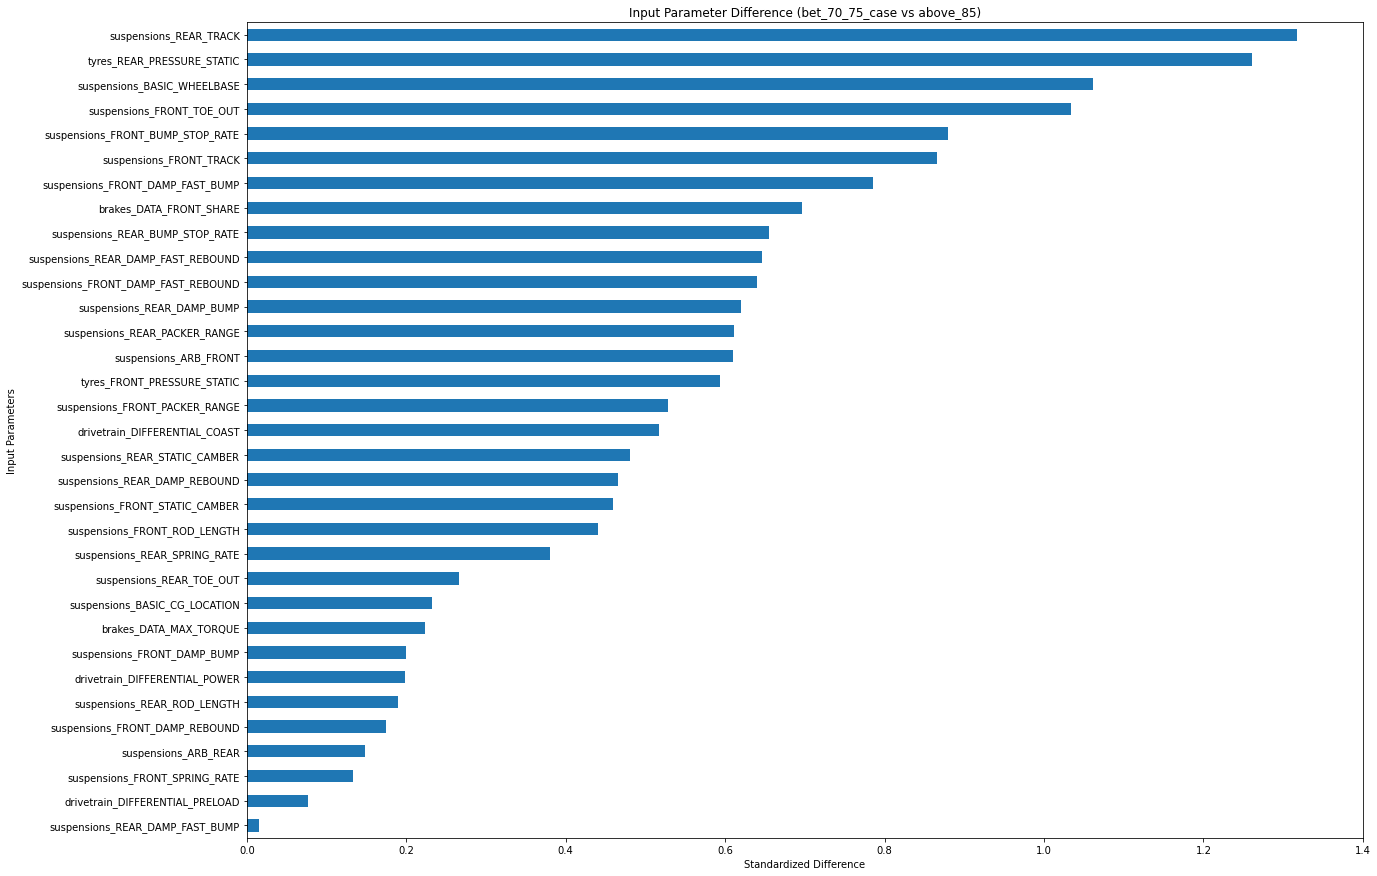

In [29]:
# difference visualised 
df = red_case_blue_diff_sorted
plot_diff = plt.figure()

df.plot.barh()

plot_diff.set_figheight(15)
plot_diff.set_figwidth(20)

plt.title('Input Parameter Difference (bet_70_75_case vs above_85)')
plt.ylabel('Input Parameters')
plt.xlabel('Standardized Difference')
plt.tick_params(axis = 'y', which = 'major', labelsize = 5)
plt.yticks(fontsize = 10) 
plt.xlim(0,1.4)
#plt.axvline(x = 0.5, color='r', linestyle='dashed', linewidth=1)
plt.show()

If we look at differences greater than 0.5, we can see that more than half of the input parameters differ significantly from the blue speed group. The top 5 are:
1. suspensions_REAR_TRACK
2. tyres_REAR_PRESSURE_STATIC
3. suspensions_BASIC_WHEELBASE
4. suspensions_FRONT_TOE_OUT 
5. suspensions_FRONT_BUMP_STOP_RATE

We can see that more than half of the input parameters differ by above 0.5 in comparison to the blue speed group. This is meant to explain why the peformance for bet_70_75_case was bad using the parameters. 

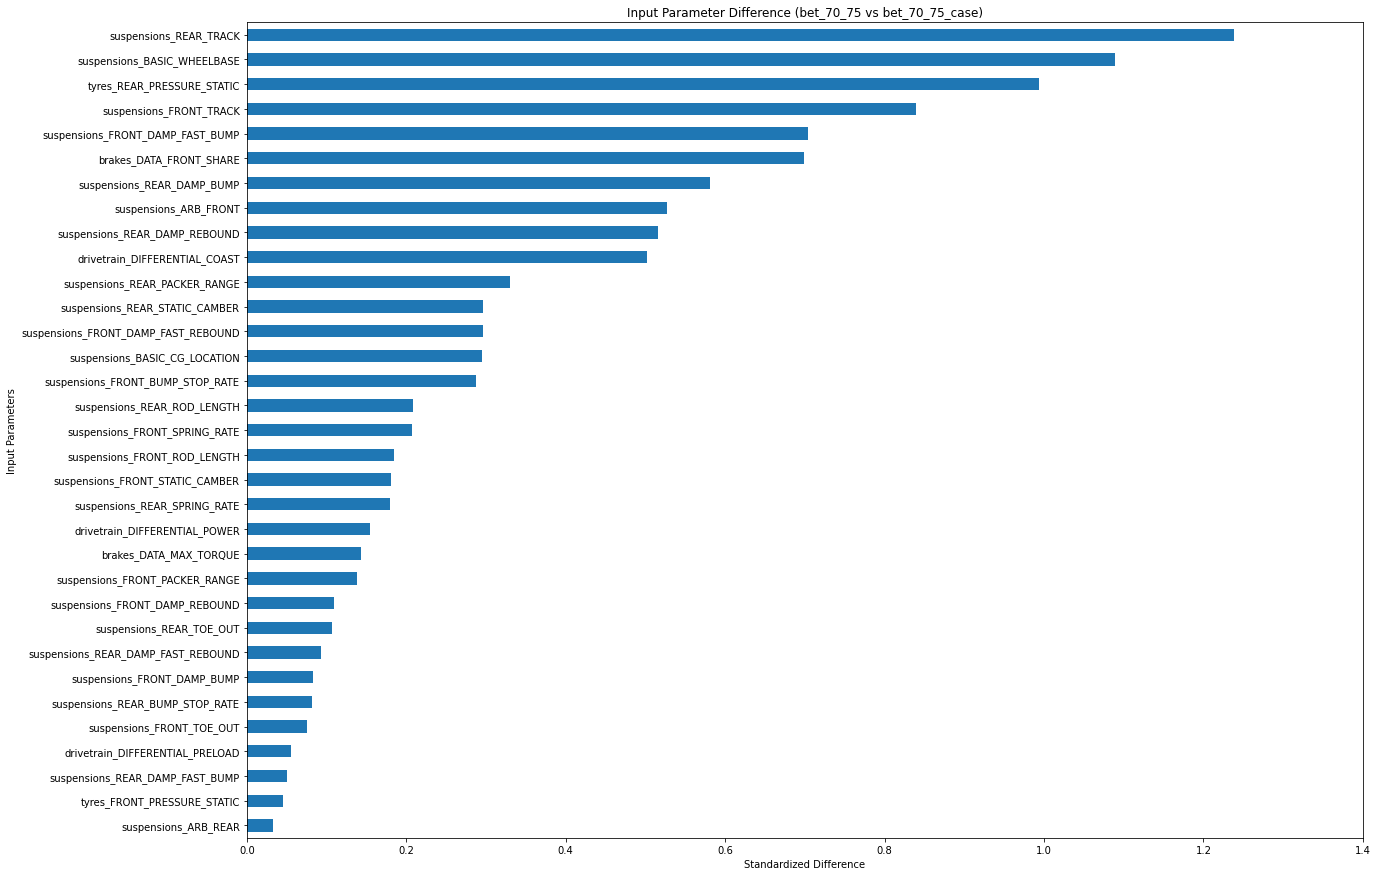

In [30]:
# look at the difference between bet_70_75 and bet_70_75_case
df = red_red_case_blue_diff_sorted
plot_diff = plt.figure()

df.plot.barh()

plot_diff.set_figheight(15)
plot_diff.set_figwidth(20)

plt.title('Input Parameter Difference (bet_70_75 vs bet_70_75_case)')
plt.ylabel('Input Parameters')
plt.xlabel('Standardized Difference')
plt.tick_params(axis = 'y', which = 'major', labelsize = 5)
plt.yticks(fontsize = 10) 
plt.xlim(0,1.4)
#plt.axvline(x = 0.5, color='r', linestyle='dashed', linewidth=1)
plt.show()

This explains which parameters had the biggest impact on the performance for the red group. 

In [31]:
df_85_inf_best = df_recent.query("SpeedKMH_max >= 85 & LapTime_max <= 40000")

In [32]:
df_85_inf_best.describe()

SpeedKMH_mean  SpeedKMH_max  SpeedKMH_min   Gas_mean       Gas_max  \
count      28.000000     28.000000     28.000000  28.000000  2.800000e+01   
mean       61.811179     92.470862     40.052555   0.790648  9.999999e-01   
std         0.180399      0.461223      0.590576   0.020268  1.126422e-08   
min        61.487332     91.930199     39.039703   0.767222  9.999999e-01   
25%        61.694553     92.174505     39.481319   0.772808  9.999999e-01   
50%        61.804441     92.392372     40.090139   0.778406  9.999999e-01   
75%        61.865074     92.512070     40.512870   0.812445  9.999999e-01   
max        62.298291     93.687057     41.044365   0.819943  1.000000e+00   

            Gas_min  Brake_mean  Brake_max     Brake_min  Clutch_mean  ...  \
count  2.800000e+01   28.000000  28.000000  2.800000e+01         28.0  ...   
mean   5.250162e-05    0.052472   0.933134  1.328694e-40          1.0  ...   
std    7.278998e-05    0.010474   0.098791  2.445020e-40          0.0  ...   
min    1.430860e-11    0.030239   0.696779  9.893167e-43          1.0  ...   
25%    7.110316e-10    0.047781   0.927317  5.356113e-42          1.0  ...   
50%    2.132007e-09    0.056857   0.980999  1.974710e-41          1.0  ...   
75%    8.323235e-05    0.059398   0.992638  6.573947e-41          1.0  ...   
max    2.179271e-04    0.064381   0.999766  9.040743e-40          1.0  ...   

       suspensions_REAR_STATIC_CAMBER  suspensions_REAR_SPRING_RATE  \
count                       28.000000                     28.000000   
mean                        -2.256959                  43857.073848   
std                          0.393219                   8862.602020   
min                         -2.687320                  32906.883270   
25%                         -2.595560                  37483.256020   
50%                         -2.309710                  37924.768850   
75%                         -1.959860                  54257.939400   
max                         -1.375950                  54257.939400   

       suspensions_REAR_BUMP_STOP_RATE  suspensions_REAR_PACKER_RANGE  \
count                        28.000000                      28.000000   
mean                     142666.035775                       0.102157   
std                       54202.411641                       0.018223   
min                       64155.596130                       0.072980   
25%                      104285.309423                       0.094655   
50%                      153322.249020                       0.107610   
75%                      195690.629990                       0.118890   
max                      195690.629990                       0.118890   

       suspensions_REAR_DAMP_BUMP  suspensions_REAR_DAMP_FAST_BUMP  \
count                   28.000000                        28.000000   
mean                  3150.560591                      2290.782259   
std                   1082.759600                       860.944616   
min                   1503.632480                      1091.024110   
25%                   2177.093635                      1807.352500   
50%                   3980.612080                      1807.352500   
75%                   3985.272345                      3304.334390   
max                   3999.253140                      3363.710930   

       suspensions_REAR_DAMP_REBOUND  suspensions_REAR_DAMP_FAST_REBOUND  \
count                      28.000000                           28.000000   
mean                     2443.864696                         2815.641504   
std                       703.334253                          431.372450   
min                      1520.002640                         2256.092910   
25%                      1933.529250                         2320.834890   
50%                      2260.300780                         2861.041790   
75%                      3278.200740                         3170.950060   
max                      3278.200740                         3473.828110 

## Cases that we will be testing the models on 

In [36]:
df_85_inf = df_recent.query("SpeedKMH_max >= 85 & LapTime_max <= 45000")
df_70_75 = df_recent.query("SpeedKMH_max >= 70 & SpeedKMH_max < 75 & LapTime_max <= 50000")
df_70_75_worst = df_recent.query("SpeedKMH_max >= 70 & SpeedKMH_max < 75 & LapTime_max >= 50000")
df_75_80 = df_recent.query("SpeedKMH_max >= 75 & SpeedKMH_max < 80 & LapTime_max <= 50000")
df_80_85 = df_recent.query("SpeedKMH_max >= 80 & SpeedKMH_max < 85 & LapTime_max <= 45000")

In [37]:
best_average_input_params = df_85_inf.iloc[:,-33:]
case2_average_input_params = df_80_85.iloc[:,-33:]
case3_average_input_params = df_75_80.iloc[:,-33:]
case4_average_input_params = df_70_75.iloc[:,-33:]
worst_average_input_params = df_70_75_worst.iloc[:,-33:]

In [38]:
best_average_input_params = best_average_input_params.mean(axis=0)
case2_average_input_params = case2_average_input_params.mean(axis=0)
case3_average_input_params = case3_average_input_params.mean(axis=0)
case4_average_input_params = case4_average_input_params.mean(axis=0)
worst_average_input_params = worst_average_input_params.mean(axis=0)

In [39]:
best_average_input_params.to_csv('best_average_input_params.csv')
case2_average_input_params.to_csv('case2_average_input_params.csv')
case3_average_input_params.to_csv('case3_average_input_params.csv')
case4_average_input_params.to_csv('case4_average_input_params.csv')
worst_average_input_params.to_csv('worst_average_input_params.csv')